In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [4]:
train_dir = '/content/drive/MyDrive/Dataset/Training'
test_dir = '/content/drive/MyDrive/Dataset/Testing'


In [5]:
batch_size = 32
image_width, image_height = 150, 150
num_classes = len(os.listdir(train_dir))


In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 1949 images belonging to 8 classes.
Found 1202 images belonging to 8 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
import matplotlib.pyplot as plt

# ...
num_epochs = 10
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=num_epochs,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)



Epoch 1/10
60/60 [==============================] - 214s 4s/step - loss: 1.2736e-05 - accuracy: 1.0000 - val_loss: 3.4191 - val_accuracy: 0.3564
Epoch 2/10
60/60 [==============================] - 248s 4s/step - loss: 1.0781e-05 - accuracy: 1.0000 - val_loss: 3.7208 - val_accuracy: 0.3564
Epoch 3/10
60/60 [==============================] - 241s 4s/step - loss: 8.5757e-06 - accuracy: 1.0000 - val_loss: 3.6280 - val_accuracy: 0.3573
Epoch 4/10
60/60 [==============================] - 250s 4s/step - loss: 8.1488e-06 - accuracy: 1.0000 - val_loss: 3.7830 - val_accuracy: 0.3581
Epoch 5/10
60/60 [==============================] - 215s 4s/step - loss: 7.0469e-06 - accuracy: 1.0000 - val_loss: 3.7786 - val_accuracy: 0.3590
Epoch 6/10
60/60 [==============================] - 241s 4s/step - loss: 6.4246e-06 - accuracy: 1.0000 - val_loss: 3.8202 - val_accuracy: 0.3606
Epoch 7/10
60/60 [==============================] - 249s 4s/step - loss: 5.4347e-06 - accuracy: 1.0000 - val_loss: 3.9668 - val_ac

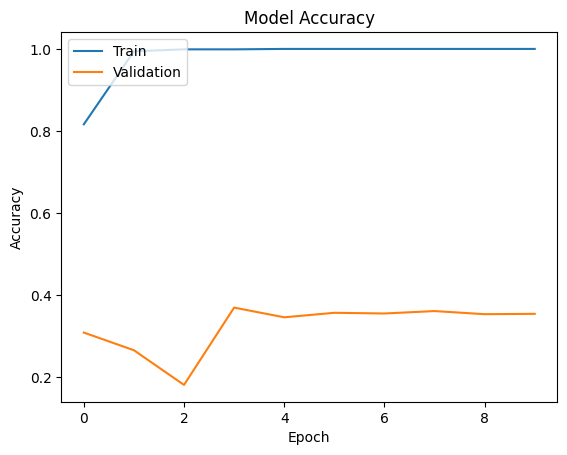

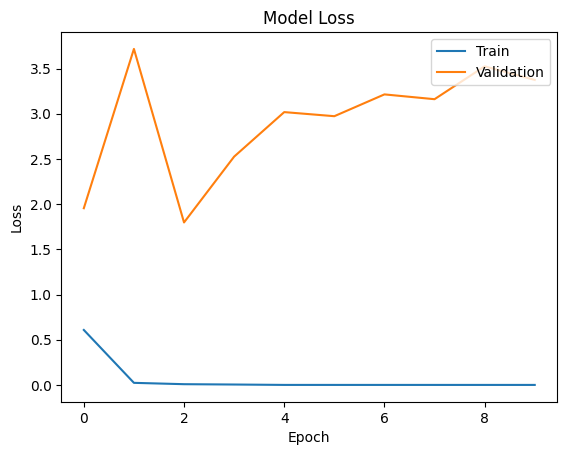

In [9]:
# Save accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('/content/drive/MyDrive/accuracy_graph.png')
plt.show()

# Save loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('/content/drive/MyDrive/loss_graph.png')
plt.show()


In [12]:
model.save('/content/drive/MyDrive/prawnmodel.h5')